# ОПРЕДЕЛЕНИЕ РЕКУРСИИ И ЕЁ ПРИМЕНЕНИЕ



Вы наверняка замечали, что если поставить два зеркала друг напротив друга, отражения в них начнутся повторяться и всё больше и больше уходить вдаль. При этом получается так, что в зеркале появляется отражение его самого, которое всё продолжает появляться в уменьшенной копии. Это явление, когда какой-то объект содержит в себе самого себя, называется рекурсией.

Рекурсии могут возникнуть и в бытовых ситуациях. Например, нам необходимо совершить одни и те же действия (переместить, удалить, переименовать, задать значки и т. д.) со всеми файлами во вложенных папках. Каждая папка содержит несколько папок, в этих папках также есть папки, в тех — ещё папки. Так будет продолжаться до тех пор, пока мы не дойдём до конечной папки, в которой не будет вложенных папок.

> Функции также могут быть рекурсиями. При этом подразумевается, что рекурсивная функция в своём теле использует ссылку на саму себя. Однако, в отличие от двух зеркал, в рекурсивной функции должно быть прописано такое условие, при выполнении которого функция перестаёт вызывать сама себя. Такое условие будем называть условием выхода из рекурсии (его также называют базовым случаем).

Например, для прохода по вложенным папкам условие выхода из рекурсии — «в текущей папке больше нет вложенных папок» (в этом случае рекурсия останавливается).

Чтобы научиться применять рекурсию, вам необходимо будет «расширить границы своего мышления», так как поначалу синтаксис может казаться вам странным. Однако рекурсивные функции позволяют быстро и лаконично реализовать свою идею в коде. Попробуем научиться «мыслить рекурсивно».

СУММА ЭЛЕМЕНТОВ СПИСКА ЧЕРЕЗ РЕКУРСИЮ

Для начала рассмотрим простой, но важный для понимания пример. Задача, которую мы уже решали множество раз различными способами — найти сумму элементов в списке. На этот раз решим её с помощью рекурсии, чтобы понять, как она работает.

У нас есть список чисел, например [10, 21, 24, 12]. Представим, что мы забыли, как складывать несколько чисел сразу, но помним, как складывать два числа между собой.

У нас есть четыре числа.

Что такое сумма чисел в списке [10, 21, 24, 12]? Это 10 + сумма в списке [21, 24, 12].

Что такое сумма списка [21, 24, 12]?  Это 21 + сумма [24, 12].

А что такое сумма списка [24, 12]? Это 24 + 12 = 36.

Элементов в списке больше не осталось.

А теперь идём в обратную сторону: 36 + 21 = 57; 57 + 10 = 67.

Математически наши вычисления можно записать следующим образом:

    10 + 21 + 24 + 12 = 10 + (21+ 24+12) = 10 + (21 + (24+12)) = 10 + (21 + 36) = 10 + 57 = 67

> Не напомнили ли вам наши вычисления пример с зеркалом? Мы несколько раз подряд производили одну и ту же операцию — складывали первое число со списком из оставшихся, но, в отличие от зеркала, когда мы дошли точки остановки (список закончился), мы прекратили выполнение операций и пошли в обратную сторону.

Это и есть пример рекурсивных вычислений. У нас есть операция (функция), которая обращается к самой себе до тех пор, пока не выполнится условие.

Посмотрим теперь, как это выглядит в коде. Объявим функцию `sum_lst()` с одним аргументом `lst` — списком, по которому нужно рассчитать сумму.

Прежде всего в рекурсивной функции прописывается условие выхода из рекурсии — условие остановки. Это условие, когда функция возвращает определённое значение. Более детально о его важности мы поговорим чуть позже. Наше условие — список пуст (его длина равна 0). Если это условие выполнилось, мы возвращаем 0 (сумма пустого списка).

В противном случае, функция `sum_lst()` возвращает сумму первого элемента в списке с результатом вызова самой себя, но в аргументы уже передаётся список, из которого исключён первый элемент:

In [ ]:
def sum_lst(lst):
    # Выводим текущее значение lst
    print(lst)
    # Задаём условие выхода из рекурсии
    if not lst:  # в исходной программе (на платформе курса) условие было
                 # задано: len(lst) == 0
        return 0
    # Во всех других случаях возвращаем
    # сумму первого элемента списка 
    # и результат суммирования оставшихся
    return lst[0] + sum_lst(lst[1:])
 
my_lst = [10, 21, 24, 12]
print(sum_lst(my_lst))

[10, 21, 24, 12]
[21, 24, 12]
[24, 12]
[12]
[]
67


Алгоритм работы можно представить в виде схемы:

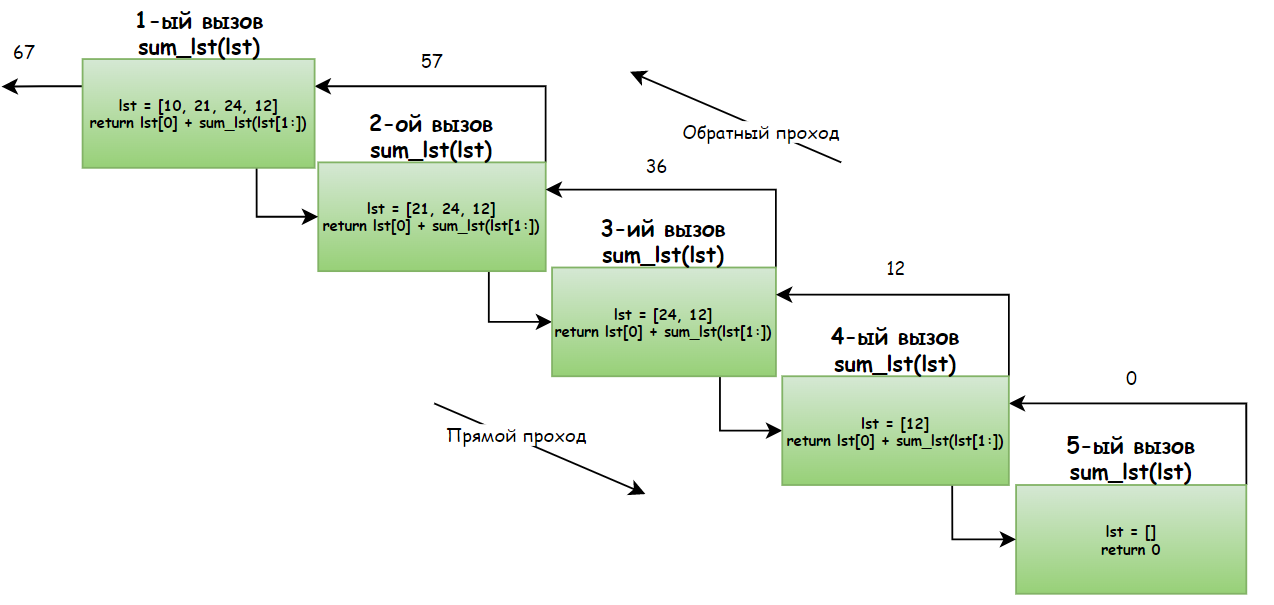

**Как работает наша функция?**



1.   При первом вызове `sum_lst()` в основной части программы локальная переменная `lst = [10, 21, 24, 12]`. Длина `lst` не равна `0`, а значит выполняется основной блок. В нём мы извлекаем из списка `lst` первый по счёту элемент (число `10`) и складываем его с результатом вызова функции `sum_lst()`, но передаём в неё не весь список, а только оставшиеся числа: `[21, 24, 12]`. Так как функция ещё не получила окончательного ответа, то выполнение (возвращение значения оператором `return`) текущего вызова `sum_lst()` откладывается, пока не выполнится новый.

2.   Функция `sum_lst()` выполняется вновь. Теперь локальная переменная `lst = [21, 24, 12]`. Длина `lst` не равна `0`, а значит выполняется основной блок. В нём мы извлекаем из списка `lst` первый по счёту элемент (число `21`) и складываем его с результатом вызова функции `sum_lst()`, но передаём в неё не весь список, а только оставшиеся числа: `[24, 12]`. Выполнение текущего вызова `sum_lst()` откладывается, пока не выполнится новый.

3.   И снова происходит выполнение функции `sum_lst()`. Всё то же самое, что и раньше, только теперь `lst = [24, 12]`. Первый элемент списка — число `24`, а оставшийся — `[12]`. Вызываем функцию для оставшихся элементов. Выполнение текущего вызова `sum_lst()` откладывается, пока не выполнится новый.

4.   Мы вновь внутри функции `sum_lst()`, но теперь `lst = [12]`. Список не пустой, а значит выполнение функции продолжается. Первый элемент списка (он же единственный) — число `12`. Оставшиеся элементы — пустой список. Вызываем функцию для него. Выполнение текущего вызова `sum_lst()` откладывается, пока не выполнится новый.

5.   Финал (ну, почти)! Список `lst = []`. Его длина равна `0`, а значит функция наконец-то что-то возвращает, а именно — число `0`.

6.   Осталось собрать результаты каждого из вызовов — идём в обратную сторону: результат последнего вызова — 0, складываем его с 12, потом прибавляем 24, затем 21 и, наконец, 10. Получаем 67.

Именно по такому принципу работают все рекурсивные функции.

> Вы могли обратить внимание на то, что при рекурсии выполнение функций, результат выполнения которых ещё не известен, «откладывается». Существует ли какое-то хранилище, в которое «откладываются» невыполненные функции? Да, и оно называется **стэк вызова функций**. Давайте познакомимся с этим понятием поближе.



# СТЭК ВЫЗОВА ФУНКЦИЙ



Представьте, что вы сидите за столом и проходите данный курс. В какой-то момент вы захотели сделать перерыв и пойти на кухню перекусить. Когда вы были на кухне, вам позвонил по телефону приятель, с которым вы начали беседовать. Вдруг в дверь позвонил курьер. Вы попросили друга повисеть на линии и отложили телефон, чтобы открыть дверь и взять вещи у курьера. 

Давайте остановимся на моменте открытия входной двери и посчитаем, сколько у вас сейчас прерванных задач, а также поймём, в каком порядке вы будете их завершать. Итак, вам необходимо:

1.   Взять сумки у курьера.
2.   Завершить разговор с другом.
3.   Закончить перекус.
4.   Вернуться к прохождению курса.

Задачи перечислены в том порядке, в котором они и будут выполняться. Обратите внимание, что изначально эти задачи возникали в обратном порядке.

А вот ещё одна важная аналогия: представьте, что вы моете посуду и складываете чистые тарелки друг на друга. В каком порядке вы будете брать тарелки, чтобы поставить их на полку для посуды? Правильно, в обратном — последняя помытая тарелка пойдёт на полку первой.

> Такая структура данных, в которой первым обрабатывается элемент (в данном случае задача), появившийся последним, называется стэком (или «рюкзаком»). Мы получили стэк задач. Более формально он и называется **стэком вызовов функции (call stack)**. В стэке действует правило **LIFO (last in — first out)** — «первый вошёл — последний вышел».

Ниже представлена схема работы стэка вызова трёх функций, которые последовательно вызывают друг друга:

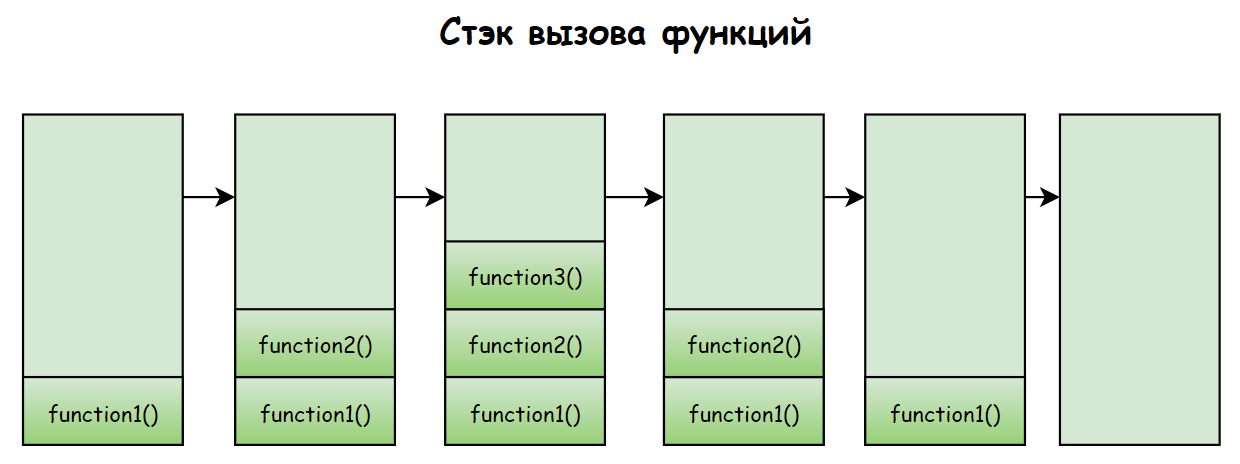

> Когда Python при выполнении одной функции встречает шаг, на котором требуется выполнить другую функцию, он кладёт начальную функцию в стэк, пока выполняет вторую. Если и во второй окажется ссылка на другую функцию, вторая задача также будет отложена в стэк. Так будет продолжаться до тех пор, пока наконец какая-нибудь функция не вернёт конкретное значение. Тогда интерпретатор начнёт свой обратный путь по стэку для выполнения отложенных, ожидающих решения задач. Это мы и увидели в нашем примере.

На нашем простом примере, который на самом деле можно было решить в одну строчку кода (`print(sum(lst))`) мы рассмотрели алгоритм работы рекурсивных функций. Теперь мы готовы решать более сложные задачи, но сначала давайте закрепим пройденное

#    ФАКТОРИАЛ ЧЕРЕЗ РЕКУРСИЮ

Возможно, вы уже знакомы с математической функцией *факториал*.

> **Примечание**. Факториал — очень важная для математики и программирования функция. Она активно используется в комбинаторике, математическом анализе, в исследовании алгоритмов, в том числе алгоритмов машинного обучения, с которыми мы будем знакомиться в нашем курсе.